## Tokenization

In [23]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I have an exam tomorrow. I have no clue what the future holds. I should figure it out by the time Iam 30. I must earn $ 20 tomorrow.")

In [3]:
for token in doc:
    print(token.text)

I
have
an
exam
tomorrow
.
I
have
no
clue
what
the
future
holds
.
I
should
figure
it
out
by
the
time
Iam
30
.
I
must
earn
$
20
tomorrow
.


In [4]:
for token in doc.ents:
    print(f"{token}, {token.label_}, {str(spacy.explain(token.label_))}")

tomorrow, DATE, Absolute or relative dates or periods
20, MONEY, Monetary values, including unit
tomorrow, DATE, Absolute or relative dates or periods


In [6]:
for token in doc.noun_chunks:
    print(token.text)

I
an exam
I
no clue
what
the future
I
it
the time
Iam
I


In [12]:
for sent in doc.sents:
    print(sent.text)

I have an exam tomorrow.
I have no clue what the future holds.
I should figure it out by the time Iam 30.
I must earn $ 20 tomorrow.


In [13]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x206c583c170>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x206c5ee08f0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x206c85f7760>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x206c65ffd50>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x206c86236d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x206c85f7a00>)]

In [16]:
with open("E:/Sem_7/Speech/Lab/test.txt") as f:
    text = f.readlines()
print(text)

['My name is Sidharth Dinesh. \n', '#####\n', '#\n', '------\n', '/////\n', 'My other detais include, 8078971474, sidart81103@gmail.com, 21bai1167. I have a house in Kerala. My parents are doctors. Their details include sindin@redifmail.com.']


In [17]:
text = " ".join(text)
text

'My name is Sidharth Dinesh. \n #####\n #\n ------\n /////\n My other detais include, 8078971474, sidart81103@gmail.com, 21bai1167. I have a house in Kerala. My parents are doctors. Their details include sindin@redifmail.com.'

In [19]:
doc = nlp(text)
for token in doc:
    if token.like_email:
        print(token)

sidart81103@gmail.com
sindin@redifmail.com


In [20]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''
doc = nlp(text)

for token in doc:
    if token.like_url:
        print(token)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


In [22]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

doc = nlp(transactions)

for token in doc:
    if token.is_currency:
        print(token)

$
€


## Stemming and Lemmatization

### Stemming

In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [30]:
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting", "better"]

for word in words:
    print(word, "||", stemmer.stem(word))

eating || eat
eats || eat
eat || eat
ate || ate
adjustable || adjust
rafting || raft
ability || abil
meeting || meet
better || better


### Lemmatization

In [29]:
doc = nlp("eating eats eat ate adjustable rafting ability meeting better")

for word in doc:
    print(word, "||", word.lemma_)

eating || eat
eats || eat
eat || eat
ate || eat
adjustable || adjustable
rafting || raft
ability || ability
meeting || meeting
better || well


In [32]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [34]:
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Bro"}], [{"TEXT":"Brah"}], [{"TEXT":"Bruv"}]], {"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! Bruv I am exhausted")

for token in doc:
    print(token, "||", token.lemma_)

Bro || Brother
, || ,
you || you
wanna || wanna
go || go
? || ?
Brah || Brother
, || ,
do || do
n't || not
say || say
no || no
! || !
Bruv || Brother
I || I
am || be
exhausted || exhaust


In [35]:
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Sis"}], [{"TEXT":"Sistah"}]], {"LEMMA":"Sister"})

doc = nlp("Sistah, you wanna go? Sis, don't say no! I am exhausted")

for token in doc:
    print(token, "||", token.lemma_)

Sistah || Sister
, || ,
you || you
wanna || wanna
go || go
? || ?
Sis || Sister
, || ,
do || do
n't || not
say || say
no || no
! || !
I || I
am || be
exhausted || exhaust


In [37]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

count_pos = doc.count_by(spacy.attrs.POS)

for k, v in sorted(count_pos.items()):
    print(f"{k}. {doc.vocab[k].text:{10}}:{v}")

84. ADJ       :3
85. ADP       :1
90. DET       :2
92. NOUN      :3
94. PART      :1
97. PUNCT     :1
100. VERB      :1


## Speech

In [46]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [47]:
scale_file = "E:/Sem_7/Speech/Project/new_attempt/archive_(18)/Actor_06/03-01-03-01-02-02-06.wav"
ipd.Audio("E:/Sem_7/Speech/Project/new_attempt/archive_(18)/Actor_06/03-01-03-01-02-02-06.wav")

In [48]:
scale, sr = librosa.load(scale_file)

In [49]:
print(scale)

[ 4.2675063e-05  4.8689260e-05  4.6025089e-05 ... -4.8019210e-06
 -4.2320906e-05 -3.6457815e-05]


In [50]:
print(sr)

22050


In [52]:
filter_banks = librosa.filters.mel(n_fft = 2048, sr = 22050, n_mels = 10)

In [53]:
filter_banks

array([[-0.0000000e+00,  1.1766873e-04,  2.3533746e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.8485231e-06,  1.4242615e-06,  0.0000000e+00]], dtype=float32)

In [54]:
filter_banks.shape

(10, 1025)

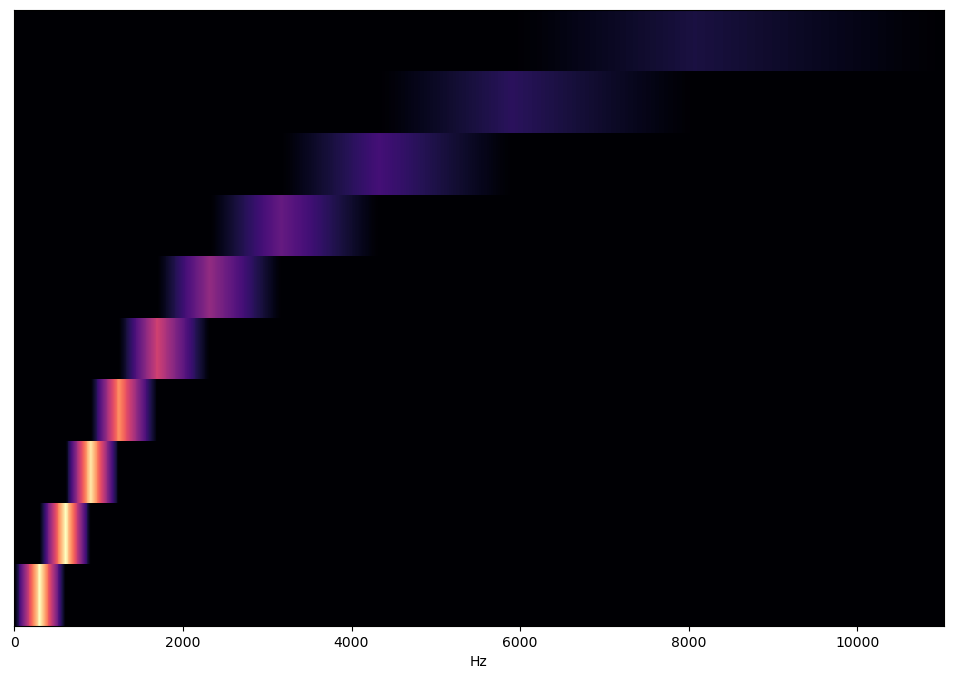

In [56]:
plt.figure(figsize=(12, 8))

librosa.display.specshow(filter_banks, sr=sr, x_axis="linear")
plt.show()

## Mel-Spectrogram

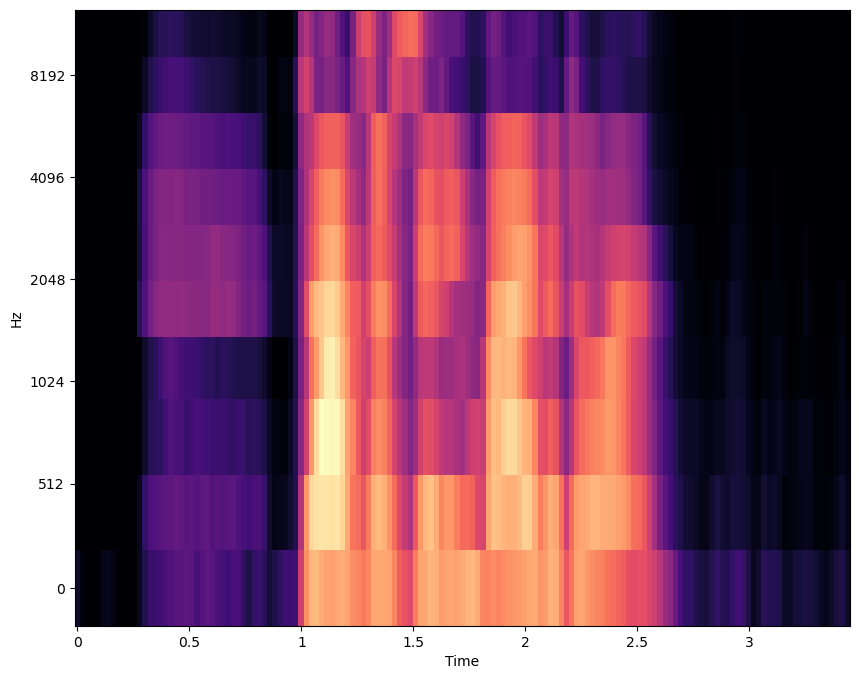

In [64]:
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels = 10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(10, 8))
librosa.display.specshow(log_mel_spectrogram, x_axis = "time", y_axis="mel", sr=sr)
plt.show()

In [72]:
mfcc = librosa.feature.mfcc(y=scale, sr=sr, n_mfcc = 13, hop_length=512, n_mels=10)
mfcc

array([[-2.4487732e+02, -2.4630910e+02, -2.4690335e+02, ...,
        -2.4139804e+02, -2.3845749e+02, -2.4306610e+02],
       [ 2.8299525e+00,  8.3002168e-01,  0.0000000e+00, ...,
         6.5203981e+00,  9.3981228e+00,  4.8190231e+00],
       [ 2.7249875e+00,  7.9923743e-01,  0.0000000e+00, ...,
         4.0016131e+00,  4.4255018e+00,  3.3462310e+00],
       ...,
       [ 1.3007865e+00,  3.8151908e-01,  0.0000000e+00, ...,
         3.7174785e-01, -2.2984326e-01,  6.5457177e-01],
       [ 8.8540214e-01,  2.5968796e-01,  0.0000000e+00, ...,
         5.0199878e-01, -6.8168402e-02,  5.3750873e-01],
       [ 4.4822049e-01,  1.3146251e-01,  0.0000000e+00, ...,
         5.3237367e-01,  3.1332779e-01,  2.8779483e-01]], dtype=float32)

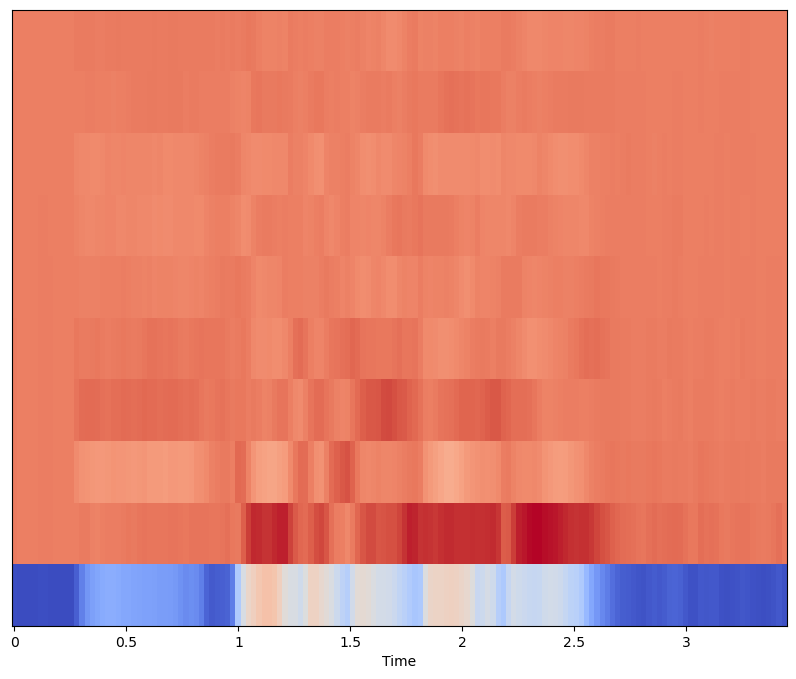

In [73]:
plt.figure(figsize=(10, 8))
librosa.display.specshow(mfcc, x_axis="time", sr=sr)
plt.show()

In [71]:
delta_mfcc = librosa.feature.delta(mfcc)
delta_mfcc

array([[-0.05641759, -0.05641759, -0.05641759, ..., -0.11825053,
        -0.11825053, -0.11825053],
       [-0.07880156, -0.07880156, -0.07880156, ..., -0.03179365,
        -0.03179365, -0.03179365],
       [-0.07587899, -0.07587899, -0.07587899, ...,  0.11628109,
         0.11628109,  0.11628109],
       ...,
       [-0.03622112, -0.03622112, -0.03622112, ..., -0.10856915,
        -0.10856915, -0.10856915],
       [-0.02465458, -0.02465458, -0.02465458, ..., -0.16754876,
        -0.16754876, -0.16754876],
       [-0.01248095, -0.01248095, -0.01248095, ..., -0.10548566,
        -0.10548566, -0.10548566]], dtype=float32)

## Bag of Words

### Unigram

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "Never jump over the lazy dog quickly"
]

# Vectorizer with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(sentences)

# Vocabulary and vectorized representation
print("Vocabulary:", vectorizer.vocabulary_)
print("Vectorized Sentences:\n", X.toarray())

Vocabulary: {'the': 10, 'quick': 8, 'brown': 0, 'fox': 2, 'jumps': 4, 'over': 7, 'lazy': 5, 'dog': 1, 'never': 6, 'jump': 3, 'quickly': 9}
Vectorized Sentences:
 [[1 1 1 0 1 1 0 1 1 0 2]
 [0 1 0 1 0 1 1 1 0 1 1]]


### Bigram

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "Never jump over the lazy dog quickly"
]

# Vectorizer with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(sentences)

# Vocabulary and vectorized representation
print("Vocabulary:", vectorizer.vocabulary_)
print("Vectorized Sentences:\n", X.toarray())

Vocabulary: {'the quick': 10, 'quick brown': 8, 'brown fox': 0, 'fox jumps': 2, 'jumps over': 4, 'over the': 7, 'the lazy': 9, 'lazy dog': 5, 'never jump': 6, 'jump over': 3, 'dog quickly': 1}
Vectorized Sentences:
 [[1 0 1 0 1 1 0 1 1 1 1]
 [0 1 0 1 0 1 1 1 0 1 0]]


## TF-IDF

### Unigram

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(sentences)

# Vocabulary and vectorized representation
print("Vocabulary:", vectorizer.vocabulary_)
print("TF-IDF Vectorized Sentences:\n", X.toarray())

Vocabulary: {'the': 10, 'quick': 8, 'brown': 0, 'fox': 2, 'jumps': 4, 'over': 7, 'lazy': 5, 'dog': 1, 'never': 6, 'jump': 3, 'quickly': 9}
TF-IDF Vectorized Sentences:
 [[0.36408901 0.25905233 0.36408901 0.         0.36408901 0.25905233
  0.         0.25905233 0.36408901 0.         0.51810466]
 [0.         0.3174044  0.         0.44610081 0.         0.3174044
  0.44610081 0.3174044  0.         0.44610081 0.3174044 ]]


### Bigram

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(sentences)

# Vocabulary and vectorized representation
print("Vocabulary:", vectorizer.vocabulary_)
print("TF-IDF Vectorized Sentences:\n", X.toarray())

Vocabulary: {'the quick': 10, 'quick brown': 8, 'brown fox': 0, 'fox jumps': 2, 'jumps over': 4, 'over the': 7, 'the lazy': 9, 'lazy dog': 5, 'never jump': 6, 'jump over': 3, 'dog quickly': 1}
TF-IDF Vectorized Sentences:
 [[0.39166832 0.         0.39166832 0.         0.39166832 0.27867523
  0.         0.27867523 0.39166832 0.27867523 0.39166832]
 [0.         0.47042643 0.         0.47042643 0.         0.33471228
  0.47042643 0.33471228 0.         0.33471228 0.        ]]


## Cosine Similarity

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(X[0], X[1])
print("Cosine Similarity:", cosine_sim[0][0])

Cosine Similarity: 0.2798280652432878


## Classifying a report type using TF-IDF and Naive Bayes/Random Forest Classifier

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Example dataset
medical_reports = [
    "Patient has a mild fever and headache",
    "Mild fever and headache reported by the patient",
    "Patient complains of mild fever and a headache",
    "The patient has been experiencing a mild headache and fever",
    "Headache and mild fever symptoms observed in the patient",
    "Severe chest pain reported with high blood pressure",
    "High blood pressure and chest pain observed in the patient",
    "Patient reports experiencing severe chest pain and elevated blood pressure",
    "Chest pain and hypertension symptoms noted in the patient",
    "The patient suffers from high blood pressure and chest pain",
    "Severe pain in the chest observed alongside high blood pressure",
    "High blood pressure is accompanied by severe chest discomfort",
    "Patient presents with elevated blood pressure and chest pain",
    "Symptoms include severe chest pain and high blood pressure"
]
financial_reports = [
    "Annual financial report for Q4 2023",
    "Annual financial summary for Q4 2023 released",
    "Financial report for Q4 2023 shows annual performance",
    "The financial results for the fourth quarter of 2023 are out",
    "Annual financial performance report for Q4 2023",
    "Q4 2023 financial summary indicates annual progress",
    "Fourth quarter financial report for 2023 indicates strong growth",
    "Q4 2023 annual financial report is finalized",
    "Annual financial outcomes reported for Q4 2023",
    "Financial performance during Q4 2023 exceeded expectations",
    "Reported financial outcomes for Q4 2023 show steady growth",
    "Sales exceeded expectations for the year",
    "Annual sales figures for the year surpassed targets",
    "Yearly sales growth is higher than anticipated",
    "Sales performance for the year exceeded projections",
    "Year-end sales report shows exceptional performance",
    "The sales report for this year highlights strong results",
    "Annual sales data indicates above-average performance",
    "Yearly sales exceeded planned objectives",
    "Sales results for the year outperformed expectations",
    "Exceptional sales growth observed this year",
    "Annual sales report reflects better-than-expected performance",
    "Yearly revenue from sales surpassed forecasts",
    "End-of-year sales results indicate a strong performance",
    "The sales report shows a better-than-expected revenue increase"
]

all_reports = medical_reports + financial_reports

labels = ["medical"] * len(medical_reports) + ["financial"] * len(financial_reports)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(all_reports)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train and evaluate classifiers
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

   financial       1.00      1.00      1.00         8
     medical       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

   financial       1.00      1.00      1.00         8
     medical       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



## Scapy Glove Embeddings for Real or Fake Message Classification

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Convert a message to a vector by averaging its word embeddings
def message_to_vector(message, embeddings, embedding_dim=300):
    words = message.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

# Sample dataset
messages = [
    "This is a real message",
    "This is a fake message",
    "The product works great",
    "Beware, this is a scam",
    "Congratulations! You have won a prize",
    "The deal is legitimate and verified"
]
labels = [1, 0, 1, 0, 0, 1]  # 1 for Real, 0 for Fake

# Load pre-trained GloVe embeddings
glove_path = "E:/Sem_7/Speech/Lab/Glove/glove.6B/glove.6B.300d.txt"  # Update with the actual path to GloVe file
glove_embeddings = load_glove_embeddings(glove_path)

# Convert messages to vectors
embedding_dim = 300
message_vectors = np.array([message_to_vector(msg, glove_embeddings, embedding_dim) for msg in messages])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(message_vectors, labels, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pre-trained GloVe Word2Vec with Gensim

In [120]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Convert GloVe format to Word2Vec format
glove_input_file = glove_path = "E:/Sem_7/Speech/Lab/Glove/glove.6B/glove.6B.300d.txt"  # Update with the actual path to GloVe file  # Path to the GloVe file
word2vec_output_file = "E:/Sem_7/Speech/Lab/Glove/glove.6B.300d.word2vec.txt"
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the converted Word2Vec format embeddings
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Explore word vectors
print("Word Vector for 'king':", model['king'])
print("\nMost similar words to 'king':")
print(model.most_similar('king'))

# Compute similarity between two words
similarity = model.similarity('king', 'queen')
print("\nSimilarity between 'king' and 'queen':", similarity)

# Find odd word out in a list
odd_word = model.doesnt_match(['king', 'queen', 'man', 'apple'])
print("\nOdd word out:", odd_word)

# Get the top N most similar words
top_similar = model.most_similar('king', topn=5)
print("\nTop 5 words similar to 'king':", top_similar)

C:\Users\HP\AppData\Local\Temp\ipykernel_31716\1680768800.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Word Vector for 'king': [ 0.0033901 -0.34614    0.28144    0.48382    0.59469    0.012965
  0.53982    0.48233    0.21463   -1.0249    -0.34788   -0.79001
 -0.15084    0.61374    0.042811   0.19323    0.25462    0.32528
  0.05698    0.063253  -0.49439    0.47337   -0.16761    0.045594
  0.30451   -0.35416   -0.34583   -0.20118    0.25511    0.091111
  0.014651  -0.017541  -0.23854    0.48215   -0.9145    -0.36235
  0.34736    0.028639  -0.027065  -0.036481  -0.067391  -0.23452
 -0.13772    0.33951    0.13415   -0.1342     0.47856   -0.1842
  0.10705   -0.45834   -0.36085   -0.22595    0.32881   -0.13643
  0.23128    0.34269    0.42344    0.47057    0.479      0.074639
  0.3344     0.10714   -0.13289    0.58734    0.38616   -0.52238
 -0.22028   -0.072322   0.32269    0.44226   -0.037382   0.18324
  0.058082   0.26938    0.36202    0.13983    0.016815  -0.34426
  0.4827     0.2108     0.75618   -0.13092   -0.025741   0.43391
  0.33893   -0.16438    0.26817    0.68774    0.311     -0.2509

## Word2Vec (sg=0(CBOW), sg=1(Skipgram))

In [118]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (messages)
messages = [
    "This is a real message",
    "This is a fake message",
    "The product works great",
    "Beware, this is a scam",
    "Congratulations! You have won a prize",
    "The deal is legitimate and verified"
]
labels = [1, 0, 1, 0, 0, 1]  # 1 for Real, 0 for Fake

# Tokenize the messages
tokenized_messages = [message.split() for message in messages]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_messages, vector_size=300, window=5, min_count=1, sg=1)

# Convert a message to a vector by averaging word vectors
def message_to_vector(message, model, embedding_dim=300):
    words = message.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

# Convert messages to vectors
embedding_dim = 300
message_vectors = np.array([message_to_vector(msg, model, embedding_dim) for msg in messages])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(message_vectors, labels, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LSTM/GRU

In [122]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from keras.optimizers import Adam
from keras import regularizers

# Load IMDB dataset (binary sentiment: 0 = negative, 1 = positive)
num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure consistent input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build an LSTM Model for Sentiment Classification
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM Layer
# Alternatively, you can use GRU:
# model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))  # GRU Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f'Accuracy: {accuracy}')

391/391 [==============================] - 58s 149ms/step - loss: 0.3440 - accuracy: 0.8556
Accuracy: 0.8555999994277954


## Transformers for text classification/sentiment analysis

In [124]:
from transformers import pipeline

# Load pre-trained sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Test with a sample text
text = "I love this movie! It's fantastic."
result = sentiment_analyzer(text)
print(result)  # Output: [{'label': 'POSITIVE', 'score': 0.9998}]

E:\Anaconda\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
E:\Anaconda\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

E:\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998773336410522}]


## Transformers for Question Answering

In [125]:
from transformers import pipeline

# Load pre-trained question-answering model
qa_pipeline = pipeline("question-answering")

# Context for the QA model
context = """
Hugging Face is a company specializing in Natural Language Processing (NLP). 
They provide easy-to-use tools for NLP tasks such as text classification, question answering, and summarization.
"""

# Question to ask the model
question = "What does Hugging Face specialize in?"

# Get the answer
result = qa_pipeline(question=question, context=context)
print(result)  # Output: {'score': 0.98, 'start': 28, 'end': 52, 'answer': 'Natural Language Processing (NLP)'}


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.7962483167648315, 'start': 43, 'end': 70, 'answer': 'Natural Language Processing'}


## Transformers for Text Summarization

In [126]:
from transformers import pipeline

# Load pre-trained summarization pipeline (e.g., BART or T5)
summarizer = pipeline("summarization")

# Sample long text
text = """
Hugging Face is an NLP company that has revolutionized the field of machine learning and natural language processing. 
Their model hub provides access to state-of-the-art models for a variety of NLP tasks. 
The company’s mission is to democratize AI and provide easy-to-use tools for machine learning practitioners and researchers alike.
"""

# Get summary
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary)  # Output: [{'summary_text': 'Hugging Face is an NLP company that has revolutionized the field of machine learning and natural language processing.'}]


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]


KeyboardInterrupt



## BERT for spam/email classification

In [130]:
import pandas as pd
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the CSV file
df = pd.read_csv("E:/Sem_7/Speech/Lab/spam.csv")  # Update with your actual path to spam.csv

# Map the 'ham' and 'spam' categories to numerical labels (0 for ham, 1 for spam)
label_map = {'ham': 0, 'spam': 1}
df['Category'] = df['Category'].map(label_map)

# Ensure that the 'Message' and 'Category' columns exist
texts = df['Message'].values
labels = df['Category'].values

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text
inputs = tokenizer(list(texts), padding=True, truncation=True, return_tensors="tf", max_length=512)

# Convert tensors to NumPy arrays for compatibility with train_test_split
input_ids = inputs['input_ids'].numpy()
attention_mask = inputs['attention_mask'].numpy()  # Optional, if you want to use attention masks

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2)

# Load pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Convert the data to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"])

# Train the model with training and validation metrics
history = model.fit(train_dataset, 
                    epochs=1, 
                    validation_data=test_dataset, 
                    verbose=1)

# Print training and validation accuracy and loss
print("\nTraining and validation loss and accuracy:")
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Loss: {history.history['loss'][epoch]:.4f}, Validation Loss: {history.history['val_loss'][epoch]:.4f}")
    print(f"Training Accuracy: {history.history['accuracy'][epoch]:.4f}, Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

# Evaluate the model
predictions = model.predict(test_dataset).logits
predictions = tf.argmax(predictions, axis=1).numpy()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
  4/558 [..............................] - ETA: 48:36 - loss: 0.5898 - accuracy: 0.7812

KeyboardInterrupt: 